In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
import numpy as np
from tensorflow import feature_column
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sn
import tkinter as tk 
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
import numpy as np
from tensorflow import feature_column
import pickle
import joblib
from joblib import dump,load
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils

In [2]:
data = pd.read_csv('Crime.csv')
data.head()

,TYPE,DATE,MONTH,YEAR,TIME,AREA,CLASS
0,6,22,6,2013,22,7,1
1,6,5,7,2013,19,7,1
2,6,31,7,2013,21,7,1
3,6,11,8,2013,16,7,1
4,6,21,8,2013,22,7,1


In [ ]:
data.describe()

,TYPE,DATE,MONTH,YEAR,TIME,AREA,CLASS
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,4.58316,15.251620,6.056480,2015.000000,12.550740,10.068940,0.900000
std,2.20362,8.703651,3.339196,1.414228,7.304547,7.386777,0.300003
min,1.00000,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000
25%,3.00000,8.000000,3.000000,2014.000000,7.000000,6.000000,1.000000
50%,5.00000,15.000000,6.000000,2015.000000,14.000000,7.000000,1.000000
75%,6.00000,23.000000,9.000000,2016.000000,19.000000,16.000000,1.000000
max,11.00000,31.000000,12.000000,2017.000000,23.000000,26.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TYPE    50000 non-null  int64
 1   DATE    50000 non-null  int64
 2   MONTH   50000 non-null  int64
 3   YEAR    50000 non-null  int64
 4   TIME    50000 non-null  int64
 5   AREA    50000 non-null  int64
 6   CLASS   50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [ ]:
data.replace('?',0, inplace=True)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(data)

In [4]:
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Segregate the features from the labels
X = normalizedData[:,0:6]
Y = normalizedData[:,6]

In [6]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.86628


In [7]:
#Data reading and allocating
names = ['TYPE','DATE','MONTH','YEAR','TIME','AREA','CLASS']

df = pd.read_csv('Crime.csv')

X=df[['TYPE','DATE','MONTH','YEAR','TIME','AREA']]  # Features
y=df['CLASS']  # Labels

#Random Forest Model
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf=RandomForestClassifier(n_estimators=190)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
joblib.dump(clf,"clf")

['clf']

In [ ]:
results = model_selection.cross_val_score(clf, X, Y, cv=kfold)
print(results.mean())

0.88422


In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8998000000000002


In [ ]:
# Voting Ensemble for Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
#model2 = DecisionTreeClassifier()
#estimators.append(('cart', model2))
model3 = RandomForestClassifier()
estimators.append(('RandomForest', model3))
model4 = KNeighborsClassifier()
estimators.append(('knn',model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8979800000000001


In [ ]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('RandomForest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     clas...
                                        

Feature: 0, Score: 0.05636
Feature: 1, Score: 0.05878
Feature: 2, Score: 0.05724
Feature: 3, Score: 0.05680
Feature: 4, Score: 0.05730
Feature: 5, Score: 0.06333


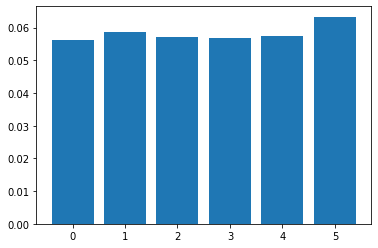

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# perform permutation importance
results = permutation_importance(clf, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1578
Accuracy: 0.89


In [ ]:
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz

In [ ]:
estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=650828333, splitter='best')

In [ ]:
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display,Image

In [ ]:
X

,TYPE,DATE,MONTH,YEAR,TIME,AREA
0,6,22,6,2013,22,7
1,6,5,7,2013,19,7
2,6,31,7,2013,21,7
3,6,11,8,2013,16,7
4,6,21,8,2013,22,7
...,...,...,...,...,...,...
49995,6,10,4,2017,19,11
49996,1,17,4,2017,9,6
49997,9,6,5,2017,0,24
49998,3,17,3,2017,13,21


In [ ]:
def save_decision_tree_as_png(clf,iteration,feature,target):
  file_name = "irs_" + str(iteration) + ".png"
  dot_data = export_graphviz(
      clf,
      out_file=None,
      feature_names=feature,
      class_names=target,
      rounded=True,
      proportion=False,
      precision=2,
      filled=True,
  )
  graph = pydotplus.graph_from_dot_data(dot_data)
  graph.write_png(file_name)
  print("Decision Tree {} saved as png file".format(iteration + 1))

In [ ]:
images = { PIL.Image.open(f) for f in glob('./*.png')}

In [ ]:
for im in images:
  display(Image(filename=im.filename,retina=True))

In [ ]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

,importance
DATE,0.277992
TIME,0.216006
MONTH,0.169186
AREA,0.154644
YEAR,0.092736
TYPE,0.089435


In [ ]:
# Labels are the values we want to predict
labels = np.array(df['CLASS'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('CLASS', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (35000, 6)
Training Labels Shape: (15000, 6)
Testing Features Shape: (35000,)
Testing Labels Shape: (15000,)


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train,y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DATE                 Importance: 0.28
Variable: TIME                 Importance: 0.22
Variable: MONTH                Importance: 0.17
Variable: AREA                 Importance: 0.15
Variable: TYPE                 Importance: 0.09
Variable: YEAR                 Importance: 0.09


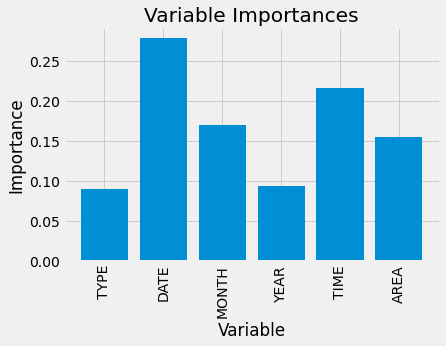

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');